# AI 221 Machine Exercise 2
# Name | SN | Batch
#
To replicate the results of the notebook, run all cells in sequence.

In [33]:
#Import libraries
import os
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import root_mean_squared_error,mean_squared_error
from sklearn.model_selection import validation_curve

In [34]:
seed = 413094539 #seed used for the report
#uncomment to generate a new seed
#seed = np.random.randint((2**31)-1)
rng = np.random.default_rng(seed)
penguin_split_seed = rng.integers((2**31)-1)
penguin_svc_state = rng.integers((2**31)-1)
bike_split_seed = rng.integers((2**31)-1)
bike_svr_state = rng.integers((2**31)-1)


print(f"Seed used for randomizer: {seed}")
print(f"Palmer Penguin Train-test Splitter Seed: {penguin_split_seed}")
print(f"Palmer Penguin SVM Classifier Seed: {penguin_svc_state}")
print(f"Bike Sharing Train-test Splitter Seed: {bike_split_seed}")
print(f"Bike Sharing SVM Classifier Seed: {bike_svr_state}")

Seed used for randomizer: 413094539
Palmer Penguin Train-test Splitter Seed: 383458658
Palmer Penguin SVM Classifier Seed: 52056122
Bike Sharing Train-test Splitter Seed: 470541649
Bike Sharing SVM Classifier Seed: 948028578


## Problem 1: Palmer Penguin Species Data Set

In [35]:
#Load the palmer penguins dataset
df_p = pd.read_csv("./datasets/penguins_size.csv")
print(df_p)


    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

## Problem 2: Predicting Bike Sharing Demand in Seoul, South Korea

In [36]:
df_b = pd.read_csv("./datasets/SeoulBikeData.csv",encoding_errors="replace")
print(df_b)

            Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
0                  2.2      

In [37]:
print(df_b.columns[1:11]) #verify the column labels in use
#preprocess data
df_b.dropna(subset=df_b.columns[1:11],inplace=True)

#split dataframe to data and labels
X = df_b.loc[df_b["Seasons"]=="Winter"].iloc[:,2:11]
y = df_b.loc[df_b["Seasons"]=="Winter"].loc[:,["Rented Bike Count"]]
display(X)
display(y)

Index(['Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')


,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2155,19,2.5,95,1.9,838,1.7,0.0,0.0,0.0
2156,20,2.7,96,1.5,1479,2.1,0.0,0.0,0.0
2157,21,2.4,95,2.5,1349,1.6,0.0,9.0,0.0
2158,22,2.3,96,1.9,1207,1.7,0.0,0.0,0.0


,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
2155,19
2156,8
2157,10
2158,13


In [38]:
print(df_b.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


### 2.a.
* Generate a boxplot of the dataset.

In [77]:
df_b_0 = df_b[df_b.columns[1:11]]
display(df_b_0)

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


,Date,variable,value
0,01/12/2017,Rented Bike Count,254.0
1,01/12/2017,Rented Bike Count,204.0
2,01/12/2017,Rented Bike Count,173.0
3,01/12/2017,Rented Bike Count,107.0
4,01/12/2017,Rented Bike Count,78.0
...,...,...,...
87595,30/11/2018,Snowfall (cm),0.0
87596,30/11/2018,Snowfall (cm),0.0
87597,30/11/2018,Snowfall (cm),0.0
87598,30/11/2018,Snowfall (cm),0.0


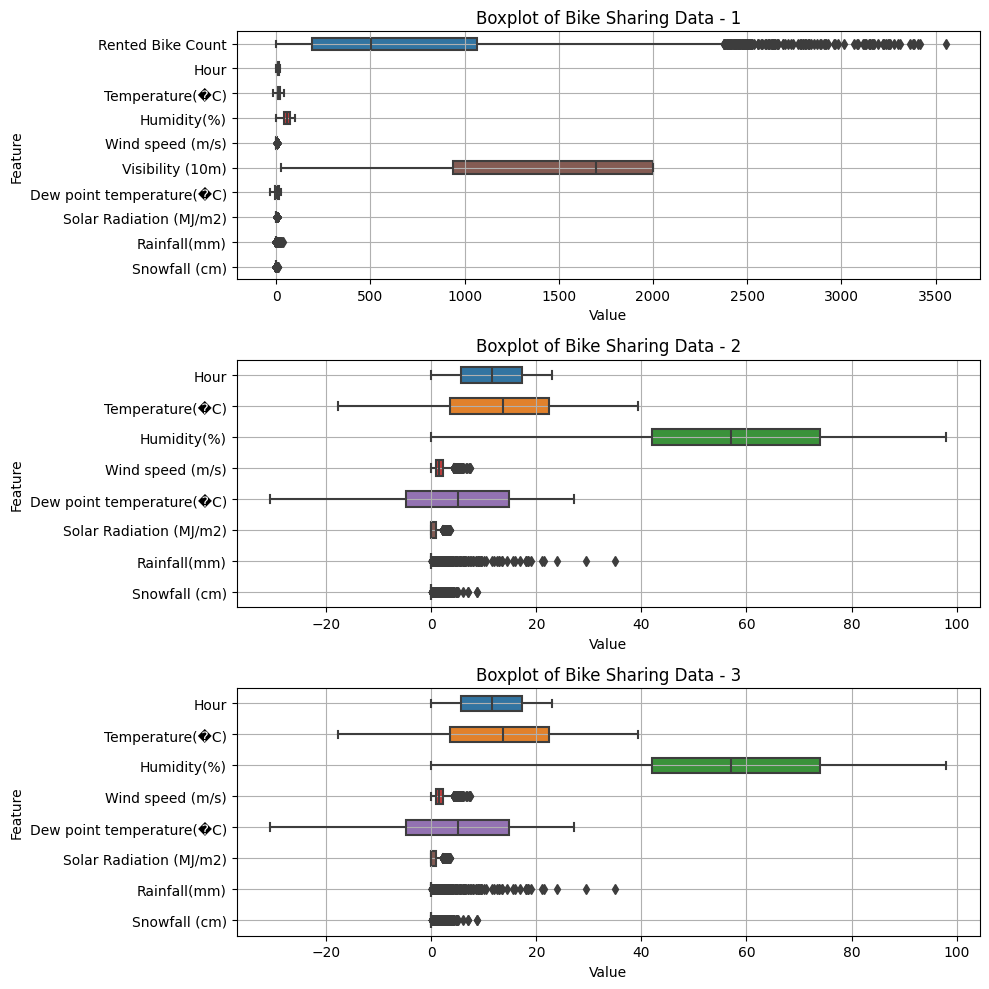

In [75]:

melted_df_b = pd.melt(df_b,id_vars="Date",value_vars=df_b.columns[1:11])
display(melted_df_b)
#Remove the two largest features to visualize the rest of the data
df_b_1 = df_b.drop(["Rented Bike Count","Visibility (10m)"],axis=1)
melted_df_b_1 = pd.melt(df_b_1,id_vars="Date",value_vars=df_b_1.columns[1:9])
df_b_2 = df_b.drop(["Rented Bike Count","Visibility (10m)"],axis=1)
melted_df_b_2 = pd.melt(df_b_2,id_vars="Date",value_vars=df_b_2.columns[1:9])


plt.figure(figsize=(10,10))
angle=30
plt.subplot(311)
sns.boxplot(data=melted_df_b,width=0.5,orient='h',x="value",y="variable")
plt.title("Boxplot of Bike Sharing Data - 1")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.grid()
plt.subplot(312)
sns.boxplot(data=melted_df_b_1,width=0.5,orient='h',x="value",y="variable")
plt.title("Boxplot of Bike Sharing Data - 2")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.grid()
plt.subplot(313)
sns.boxplot(data=melted_df_b_2,width=0.5,orient='h',x="value",y="variable")
plt.title("Boxplot of Bike Sharing Data - 3")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.grid()
plt.tight_layout()
plt.show()



### 2.b.
* Split samples into 70% training and 30% testing data randomly with stratify=y.

In [ ]:
#perform train test split : 70-30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=bike_split_seed)
print(f"Number of training samples: {len(X_train)} -> {round(100.0*len(X_train)/len(X),2)}%")
print(f"Number of testing samples: {len(X_test)} -> {round(100.0*len(X_test)/len(X),2)}%")

Number of training samples: 1512 -> 70.0%
Number of testing samples: 648 -> 30.0%


In [ ]:
def bike_objective(trial,regressors = None):
    scaler = StandardScaler()
    if not regressors:
        regressors = trial.suggest_categorical("regressors",["svr","krr","linreg"])
    match regressors:
        case "svr":
            kernel = trial.suggest_categorical("skernel",["linear", "poly", "rbf", "sigmoid"])
            gamma = trial.suggest_float('gamma',1e-2,1e2)
            epsilon = trial.suggest_float('epsilon',1e-2,1e2)
            regressor = SVR(kernel=kernel,gamma=gamma,epsilon=epsilon)
            print(f"Hyperparameters: regressor=SVR | kernel={kernel} | gamma={gamma} | epsilon={epsilon}")
        case "krr":
            alpha = trial.suggest_float('alpha',1e-2,1e2)
            kernel = trial.suggest_categorical("kkernel",["linear", "poly", "polynomial", "rbf", "laplacian", "sigmoid", "cosine"])
            gamma = trial.suggest_float('gamma',1e-2,1e2)
            degree = trial.suggest_int('degree',3,10)
            regressor = KernelRidge(alpha=alpha,kernel=kernel,gamma=gamma,degree=degree)
            print(f"Hyperparameters: regressor=KRR | alpha={alpha} | kernel={kernel} | gamma={gamma}")
        case "linreg":
            regressor = LinearRegression()
            print(f"Hyperparameters: regressor=Linear Regression")
        case _:
            print("Error: regressor not found.")
            return -1
    #make pipeline with parameters
    bike_tuning_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("reg",regressor)
    ])
    print("Pipeline done")
    #train data
    bike_tuning_pipeline.fit(X_train,y_train.values.ravel())
    print("Train done")
    #get predicted values from logistic regression
    test_prediction = bike_tuning_pipeline.predict(X_test)
    print("Predict done")
    #compute RMSE of pipeline
    test_mse = mean_squared_error(y_test,test_prediction)
    return test_mse

bike_study = optuna.create_study()
bike_study.optimize(bike_objective,n_trials=1000)
print(bike_study.best_trial)

[I 2024-03-11 14:55:53,883] A new study created in memory with name: no-name-f5ef44f0-f74d-4f6d-8e79-71477c0aea22


[I 2024-03-11 14:55:54,043] Trial 0 finished with value: 64178.05201130523 and parameters: {'regressors': 'krr', 'alpha': 93.11114981416586, 'kkernel': 'linear', 'gamma': 84.69429130933628, 'degree': 3}. Best is trial 0 with value: 64178.05201130523.


Hyperparameters: regressor=KRR | alpha=93.11114981416586 | kernel=linear | gamma=84.69429130933628
Pipeline done
Train done
Predict done
Hyperparameters: regressor=KRR | alpha=63.92541048855612 | kernel=poly | gamma=23.93833656589662
Pipeline done


c:\Users\Migui\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:241: LinAlgWarning: Ill-conditioned matrix (rcond=1.13866e-22): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
[I 2024-03-11 14:55:54,384] Trial 1 finished with value: 6955372172603.41 and parameters: {'regressors': 'krr', 'alpha': 63.92541048855612, 'kkernel': 'poly', 'gamma': 23.93833656589662, 'degree': 7}. Best is trial 0 with value: 64178.05201130523.
[I 2024-03-11 14:55:54,394] Trial 2 finished with value: 14895.532297948395 and parameters: {'regressors': 'linreg'}. Best is trial 2 with value: 14895.532297948395.
[I 2024-03-11 14:55:54,406] Trial 3 finished with value: 14895.532297948395 and parameters: {'regressors': 'linreg'}. Best is trial 2 with value: 14895.532297948395.


Train done
Predict done
Hyperparameters: regressor=Linear Regression
Pipeline done
Train done
Predict done
Hyperparameters: regressor=Linear Regression
Pipeline done
Train done
Predict done
Hyperparameters: regressor=SVR | kernel=poly | gamma=97.25691572027645 | epsilon=64.21731208542053
Pipeline done


* Construct pipeline with Standard Scaler and SVR
* Compute RMSE

In [ ]:
#define hyperparameters
kernel = "linear"
gamma = 1
epsilon = 0.1

#make pipeline with parameters
bike_svr_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("svr",SVR(kernel=kernel,gamma=gamma,epsilon=epsilon))
])

#train data
bike_svr_pipeline.fit(X_train,y_train.values.ravel())

#get predicted values from logistic regression
train_svr_prediction = bike_svr_pipeline.predict(X_train)
test_svr_prediction = bike_svr_pipeline.predict(X_test)

#compute RMSE of pipeline
train_svr_rmse = root_mean_squared_error(y_train,train_svr_prediction)
test_svr_rmse = root_mean_squared_error(y_test,test_svr_prediction)
print(f"Kernel used: {kernel}")
print(f"Kernel parameter used: {gamma}")
print(f"Epsilon used: {epsilon}")
print(f"Training Set Error: {round(train_svr_rmse,4)}")
print(f"Testing Set Error: {round(test_svr_rmse,4)}")

Kernel used: linear
Kernel parameter used: 1
Epsilon used: 0.0
Training Set Error: 129.9918
Testing Set Error: 123.0631


### 2.c.
* Repeat for KRR instead of SVR

In [ ]:
#define parameters
alpha = 0.5
kernel = "linear"
gamma = 3
degree = 5

#make pipeline with parameters
bike_krr_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("krr",KernelRidge(alpha=alpha,kernel=kernel,gamma=gamma,degree=degree))
])

#train data
bike_krr_pipeline.fit(X_train,y_train.values.ravel())

#get predicted values from linear regression
train_krr_prediction = bike_krr_pipeline.predict(X_train)
test_krr_prediction = bike_krr_pipeline.predict(X_test)

#compute RMSE of pipeline
train_krr_rmse = root_mean_squared_error(y_train,train_krr_prediction)
test_krr_rmse = root_mean_squared_error(y_test,test_krr_prediction)
print(f"Kernel used: {kernel}")
print(f"Kernel parameter used: {gamma}")
print(f"Alpha used: {alpha}")
print(f"Training Set Error: {round(train_krr_rmse,4)}")
print(f"Testing Set Error: {round(test_krr_rmse,4)}")

Kernel used: linear
Kernel parameter used: 3
Alpha used: 0.4
Training Set Error: 260.8477
Testing Set Error: 254.1985


### 2.d.
* Repeat for Linear Regression instead of SVR

In [ ]:
#make pipeline
bike_lin_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("linreg",LinearRegression(fit_intercept=True))
])

#train data
bike_lin_pipeline.fit(X_train,y_train.values.ravel())

#get predicted values from linear regression
train_lin_prediction = bike_lin_pipeline.predict(X_train)
test_lin_prediction = bike_lin_pipeline.predict(X_test)

#compute RMSE of pipeline
train_lin_rmse = root_mean_squared_error(y_train,train_lin_prediction)
test_lin_rmse = root_mean_squared_error(y_test,test_lin_prediction)
print(f"Training Set Error: {round(train_lin_rmse,4)}")
print(f"Testing Set Error: {round(test_lin_rmse,4)}")

Training Set Error: 127.1177
Testing Set Error: 122.4427


* Compare results for all three models